<strong>
    <font color="#0E1117">
        Author: lprtk
    </font>
</strong>

<br/>
<br/>

<Center>
    <h1 style="font-family: Arial">
        <font color="#0E1117">
            pyRisk library for risk management in Finance
        </font>
    </h1>
    <br/>
    <h2>
        <font color="#0E1117">
            Example of use
        </font>
    </h2>
</Center>

------------------------------------------------------------------------------------------------------------------------------- 

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Libraries import
        </font>
    </h2>
</div>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pyRisk

------------------------------------------------------------------------------------------------------------------------------- 

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Data import
        </font>
    </h2>
</div>

In [2]:
data = pd.read_csv(filepath_or_buffer="^GSPC.csv", sep=",")

In [3]:
data.head(5)

,Date,Close,Volume,Open,High,Low
0,03/25/2022,4543.06,--,4522.91,4546.03,4501.07
1,03/24/2022,4520.16,--,4469.98,4520.58,4465.17
2,03/23/2022,4456.24,--,4493.10,4501.07,4455.81
3,03/22/2022,4511.61,--,4469.10,4522.00,4469.10
4,03/21/2022,4461.18,--,4462.40,4481.75,4424.30


------------------------------------------------------------------------------------------------------------------------------- 

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Data cleaning
        </font>
    </h2>
</div>

**Step 1:**

<p style="text-align: justify">
    Initially, we will keep, only, the data we are interested in. As a result, we keep the date of the series values, and the stock price on each market closing day. We also keep the adjusted stock price which will be transformed into a daily stock return.
</p>

In [4]:
# keep, only, the columns that interest us
data = data[["Date", "Close"]]
data.rename(columns={"Close": "Price"}, inplace=True)

**Step 2:**

<p style="text-align: justify">
    The second cleaning action to be performed is to transform the daily prices at their closing. Indeed, we cannot work directly on the prices because they are not stationary. In order to perform our calculations, we will retain the price of the consisited stock at its close, then calculate its daily return as follows:
</p>

<br/>

<center>
    $r_{t}^{stock} = \frac{P_{t}^{stock} ~ - ~ P_{t-1}^{stock}}{P_{t-1}^{stock}}$
</center>

In [5]:
# calculation of the daily rate of return
data["Return"] = data["Price"].pct_change(periods=1)

**Step 3:**

<p style="text-align: justify">
    Since we have created a daily return with lagged values from one period in the series, we will delete the first row from our dataset. This is why we had extracted an extra trading day from the stock price history.
</p>

In [6]:
# delete the first line of the dataframe
data.drop(index=0, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

**Step 4:**

<p style='text-align: justify'>
    To continue, we will perform a modification of the dataframe index: the objective is to put the "Date" variable in index so that the data can be more easily analyzed with Pandas.
</p>

In [7]:
# modification of the index with dates
data["Date"] = pd.to_datetime(data["Date"])
data.set_index(keys="Date", drop=True, inplace=True)

**Step 5:**

<p style='text-align: justify'>
    Even though this should already be the case, we'll re-cast our two variables as floats to make sure they're manipulatable later.
</p>

In [8]:
data = data.apply(lambda x : x.astype(float))

**Step 6:**

<p style='text-align: justify'>
    There do not seem to be any missing values within the database. Nevertheless following the pre-processing, we will still check for their presence.
</p>

In [9]:
# check for missing values
data.isnull().sum().to_frame(name="Missing value")

,Missing value
Price,0
Return,0


------------------------------------------------------------------------------------------------------------------------------- 

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Data vizualisation
        </font>
    </h2>
</div>

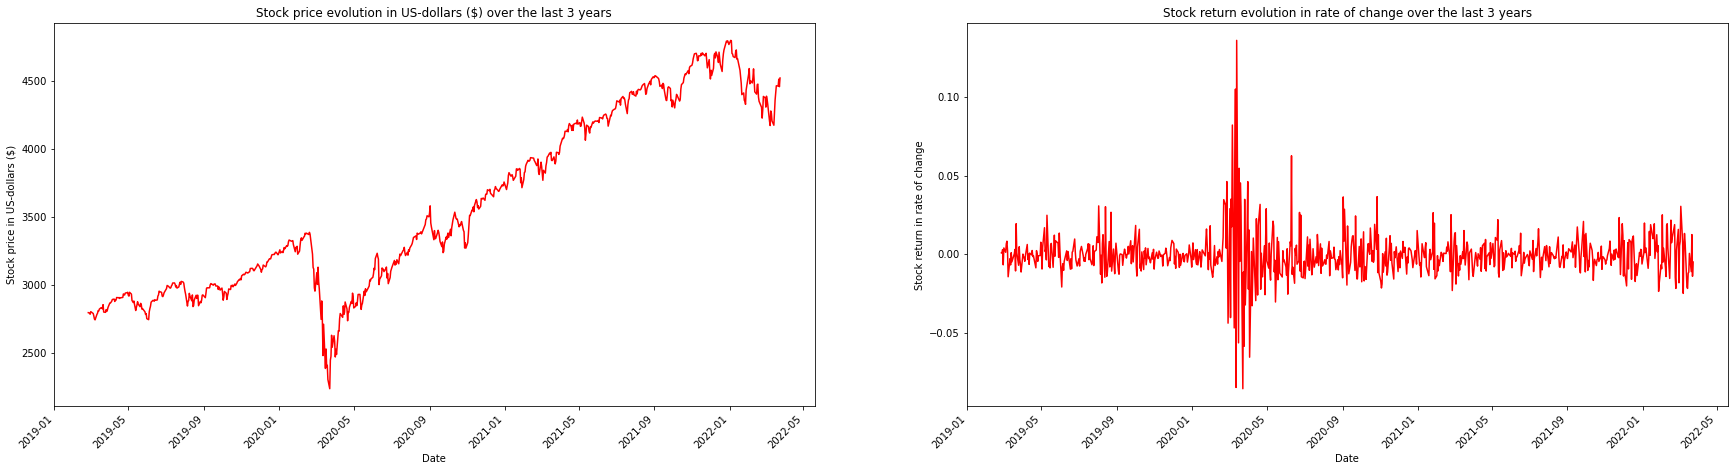

In [10]:
fig = plt.figure(figsize=(30, 18))

# line 1
plt.subplot(2, 2, 1)
data["Price"].plot(color="r", label="Stock Price")
plt.title("Stock price evolution in US-dollars ($) over the last 3 years")
plt.xlabel("Date")
plt.ylabel("Stock price in US-dollars ($)")
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
data["Return"].plot(color="r", label="Stock return")
plt.title("Stock return evolution in rate of change over the last 3 years")
plt.xlabel("Date")
plt.ylabel("Stock return in rate of change")
plt.xticks(rotation=45)

plt.subplots_adjust(hspace=0.3)
plt.show()

------------------------------------------------------------------------------------------------------------------------------- 

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            Functionalities
        </font>
    </h2>
</div>

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            1. Compute Value at Risk
        </font>
    </h2>
</div>

VaR at 99% at a one-day horizon using alternatively the following methods:
- empirical quantile,
- parametric distribution,
- nonparametric distribution,
- EVT approach.

In [11]:
df = pd.DataFrame(columns=["Method", "VaR"])

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            Empirical VaR
        </font>
    </h3>
</div>

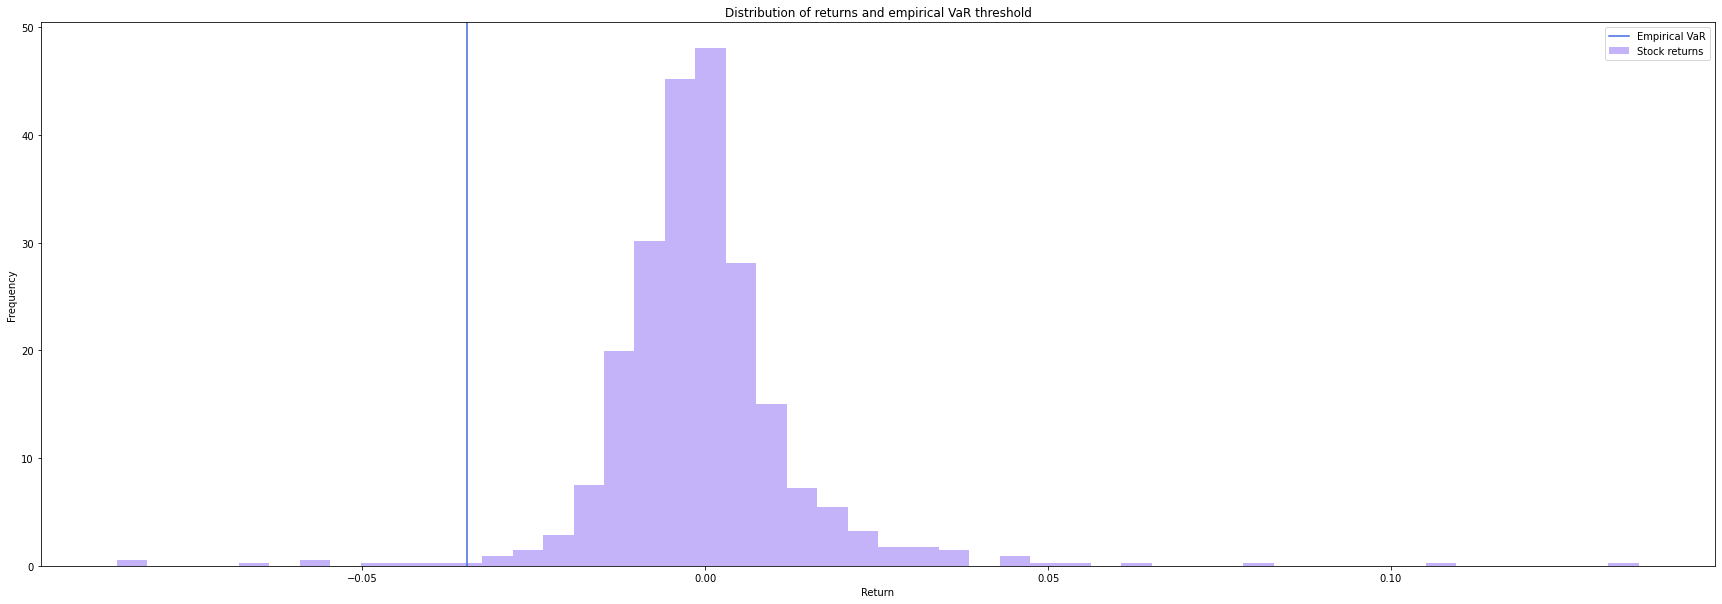

In [12]:
empirical_var = pyRisk.ValueAtRisk(
    array=data["Return"],
    alpha=0.01,
    axis=0
).empirical_var(
    plot=True,
    bins=50
)

df = df.append(dict(zip(df.columns, ["Empirical VaR", empirical_var])), ignore_index=True)

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            Parametrical VaR
        </font>
    </h3>
</div>

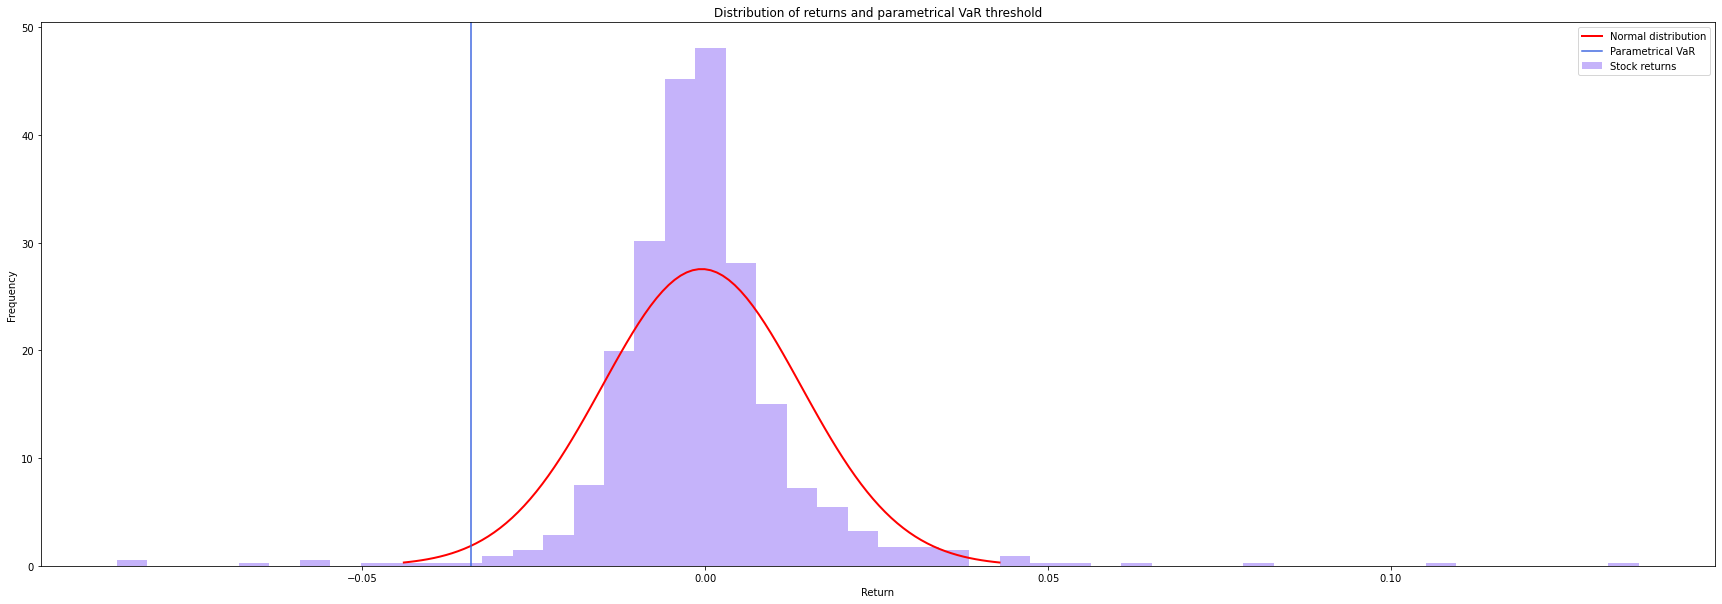

In [13]:
parametrical_var = pyRisk.ValueAtRisk(
    array=data["Return"],
    alpha=0.01,
    axis=0
).parametrical_var(
    plot=True,
    bins=50
)

df = df.append(dict(zip(df.columns, ["Parametrical VaR", parametrical_var])), ignore_index=True)

In [14]:
print(f"Mean: {pyRisk.Statistics(array=data['Return'], axis=0).mean()}")
print(f"Standard deviation: {pyRisk.Statistics(array=data['Return'], axis=0).std()}")
print(f"Skewness: {pyRisk.Statistics(array=data['Return'], axis=0).skewness()}")
print(f"Kurtosis: {pyRisk.Statistics(array=data['Return'], axis=0).kurtosis(fisher=False)}")

Mean: -0.0005200619455015323
Standard deviation: 0.014478255799968916
Skewness: 1.4574003151884705
Kurtosis: 22.166061109023314


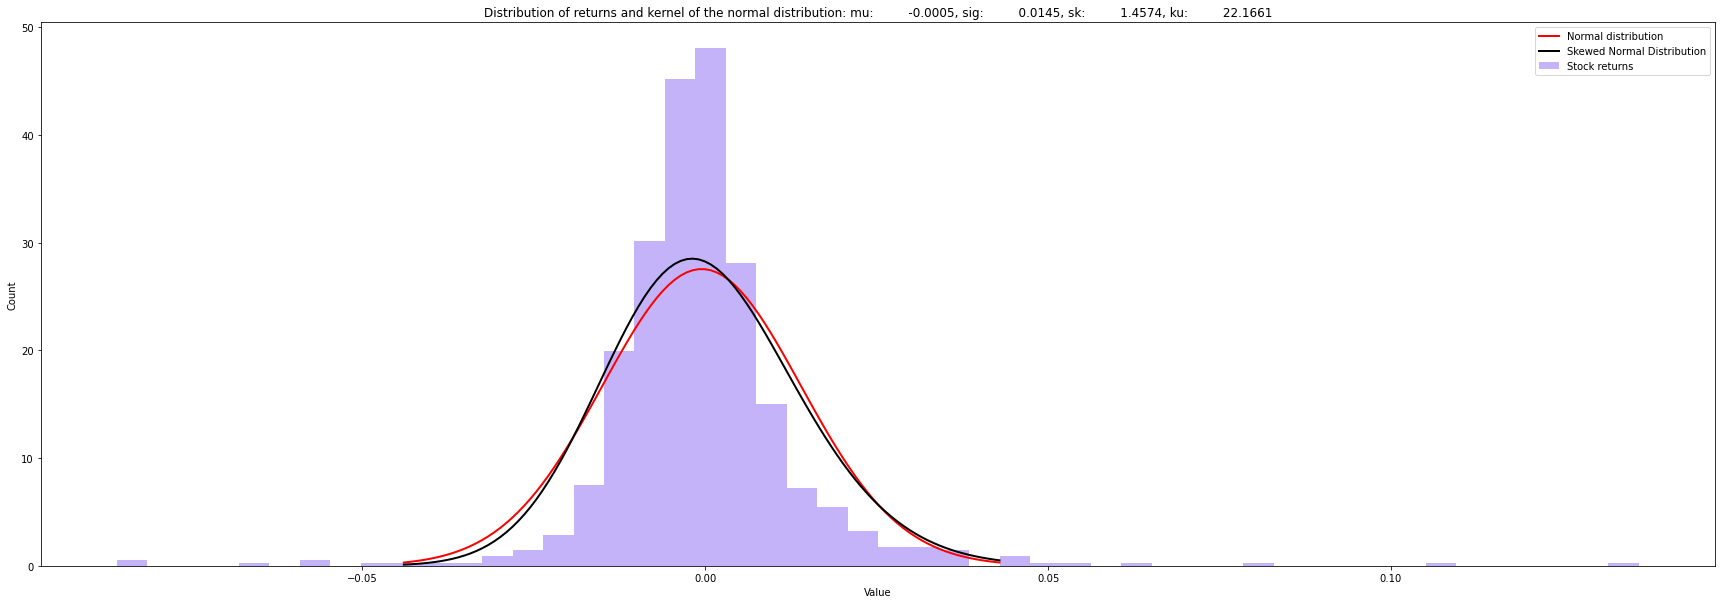

In [15]:
pyRisk.compare_hist_to_normal(array=data["Return"], bins=50)

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            Non-parametrical VaR
        </font>
    </h3>
</div>

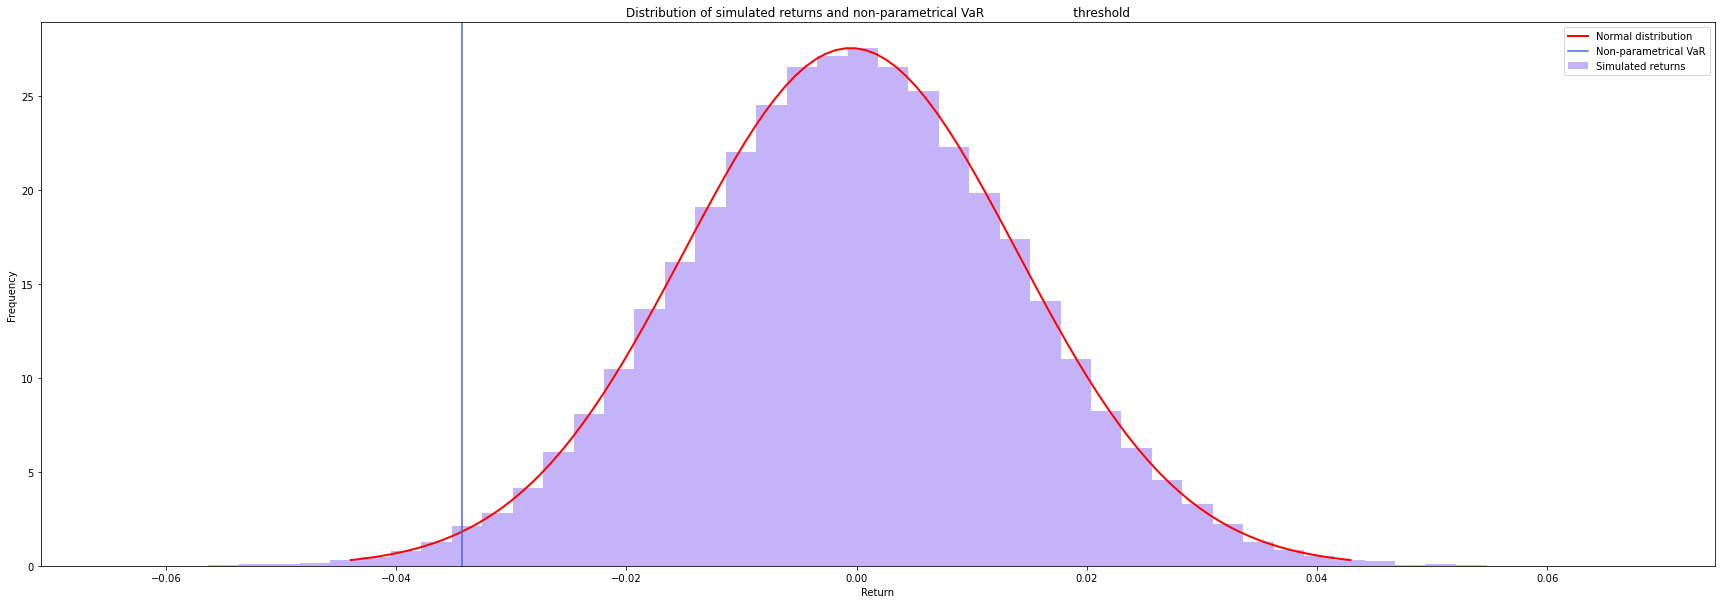

In [16]:
non_parametrical_var = pyRisk.ValueAtRisk(
    array=data["Return"],
    alpha=0.01,
    axis=0
).non_parametrical_var(
    random_state=42,
    n_iter=100000,
    plot=True,
    bins=50
)[0]

df = df.append(dict(zip(df.columns, ["Non-parametrical VaR", non_parametrical_var])), ignore_index=True)

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            EVT VaR
        </font>
    </h3>
</div>

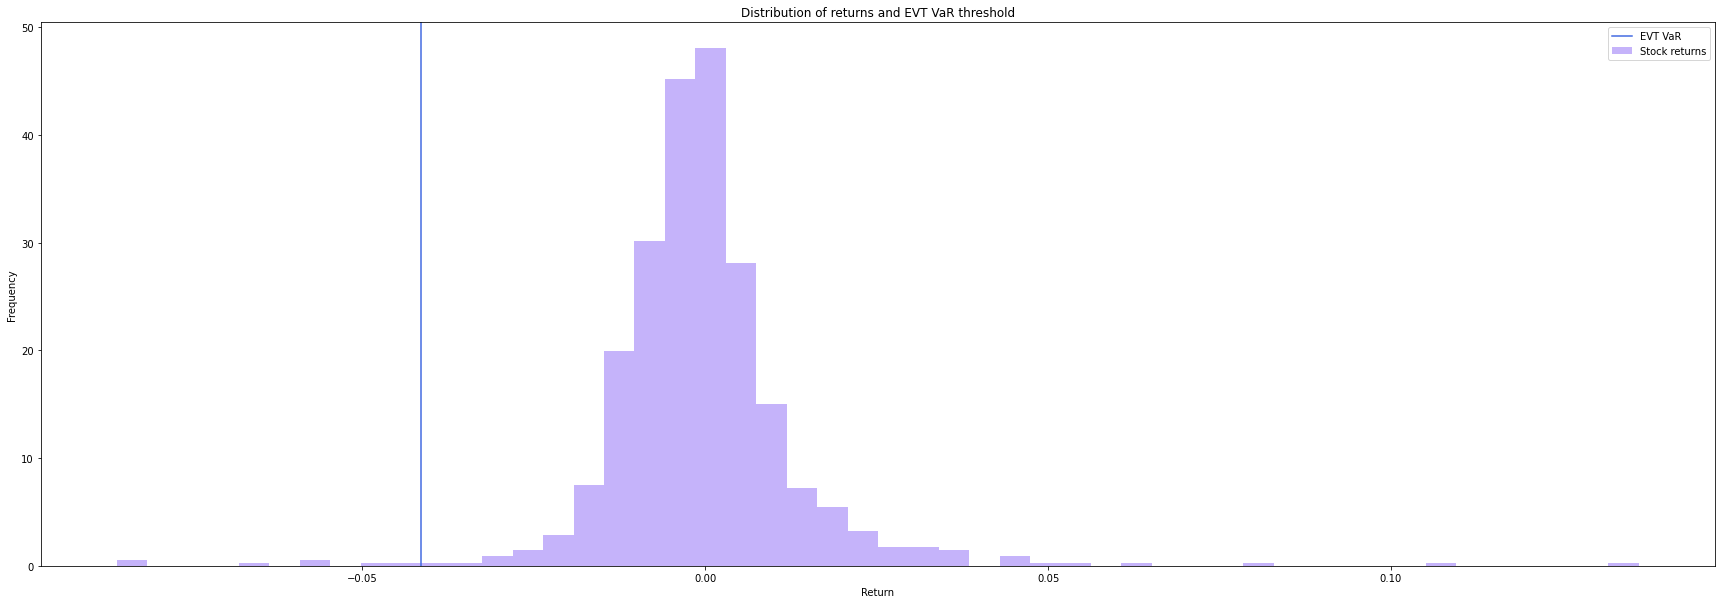

In [17]:
extreme_var = pyRisk.ValueAtRisk(
    array=data["Return"],
    alpha=0.01,
    axis=0
).extreme_var(
    k=8,
    plot=True,
    bins=50
)

df = df.append(dict(zip(df.columns, ["EVT VaR", non_parametrical_var])), ignore_index=True)

In [18]:
df.head(5)

,Method,VaR
0,Empirical VaR,-0.034673
1,Parametrical VaR,-0.034202
2,Non-parametrical VaR,-0.034333
3,EVT VaR,-0.034333


<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            2. Compute Expected Shortfall (ES or CVaR)
        </font>
    </h2>
</div>

In [19]:
df = pd.DataFrame(columns=["Method", "CVaR"])

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            Empirical CVaR
        </font>
    </h3>
</div>

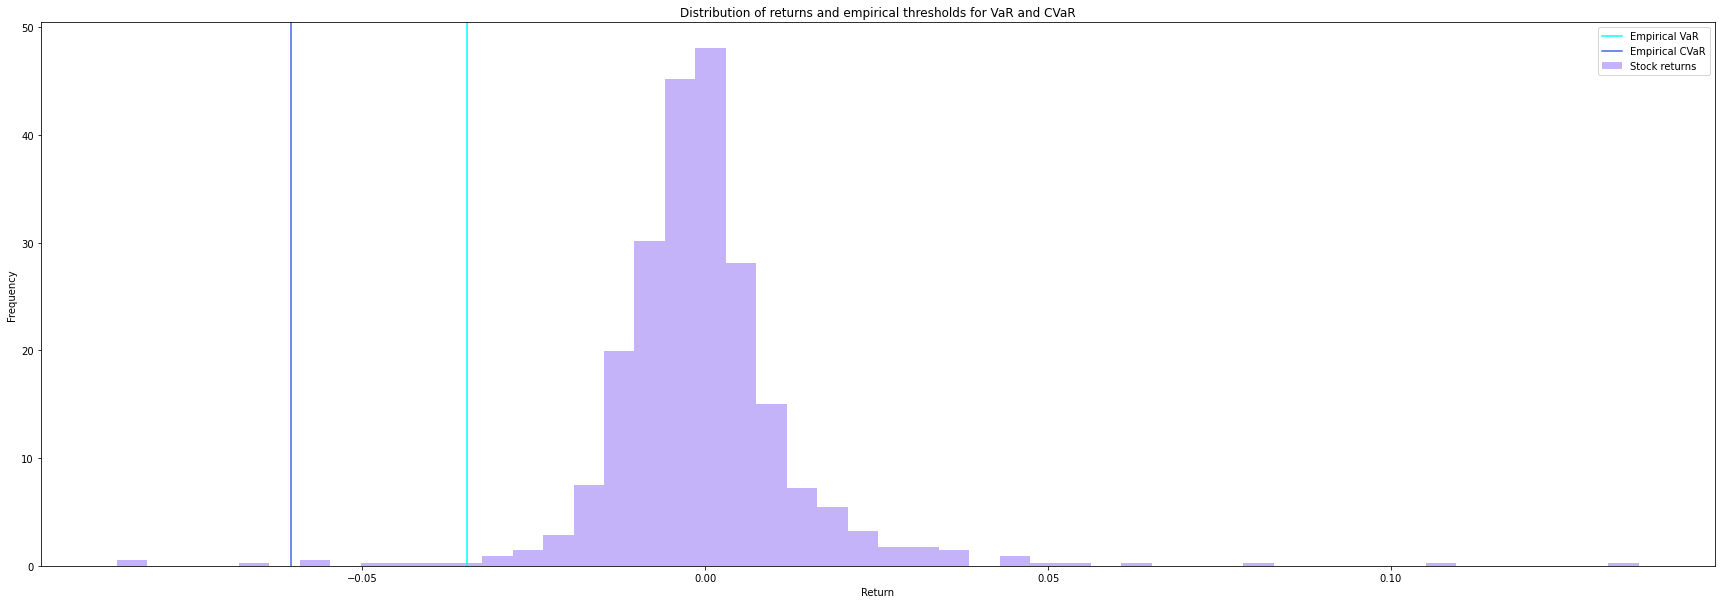

In [20]:
empirical_es = pyRisk.ExpectedShortfall(
    array=data["Return"],
    alpha=0.01,
    axis=0
).empirical_cvar(
    plot=True,
    bins=50
)

df = df.append(dict(zip(df.columns, ["Empirical CVaR", empirical_es])), ignore_index=True)

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            Parametrical CVaR
        </font>
    </h3>
</div>

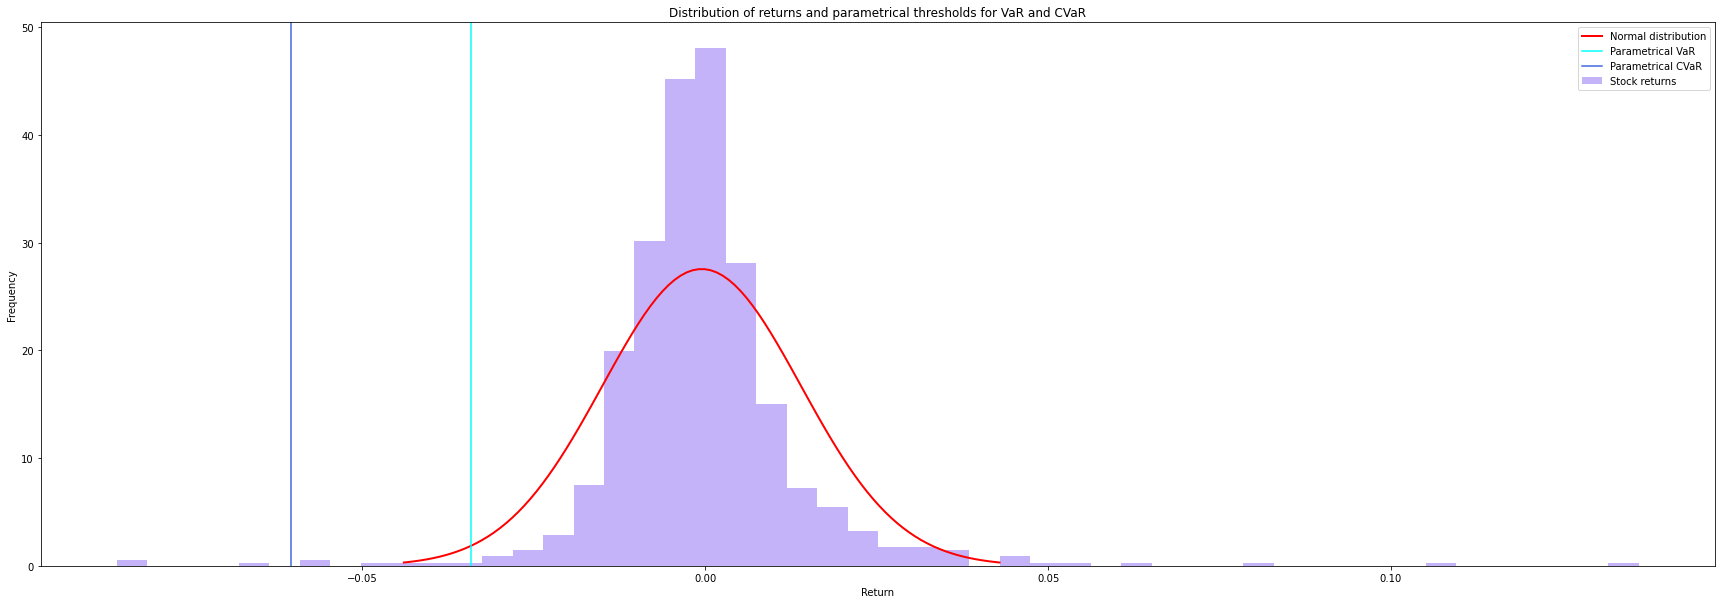

In [21]:
parametrical_es = pyRisk.ExpectedShortfall(
    array=data["Return"],
    alpha=0.01,
    axis=0
).parametrical_cvar(
    plot=True,
    bins=50
)

df = df.append(dict(zip(df.columns, ["Parametrical CVaR", parametrical_es])), ignore_index=True)

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            Non-parametrical CVaR
        </font>
    </h3>
</div>

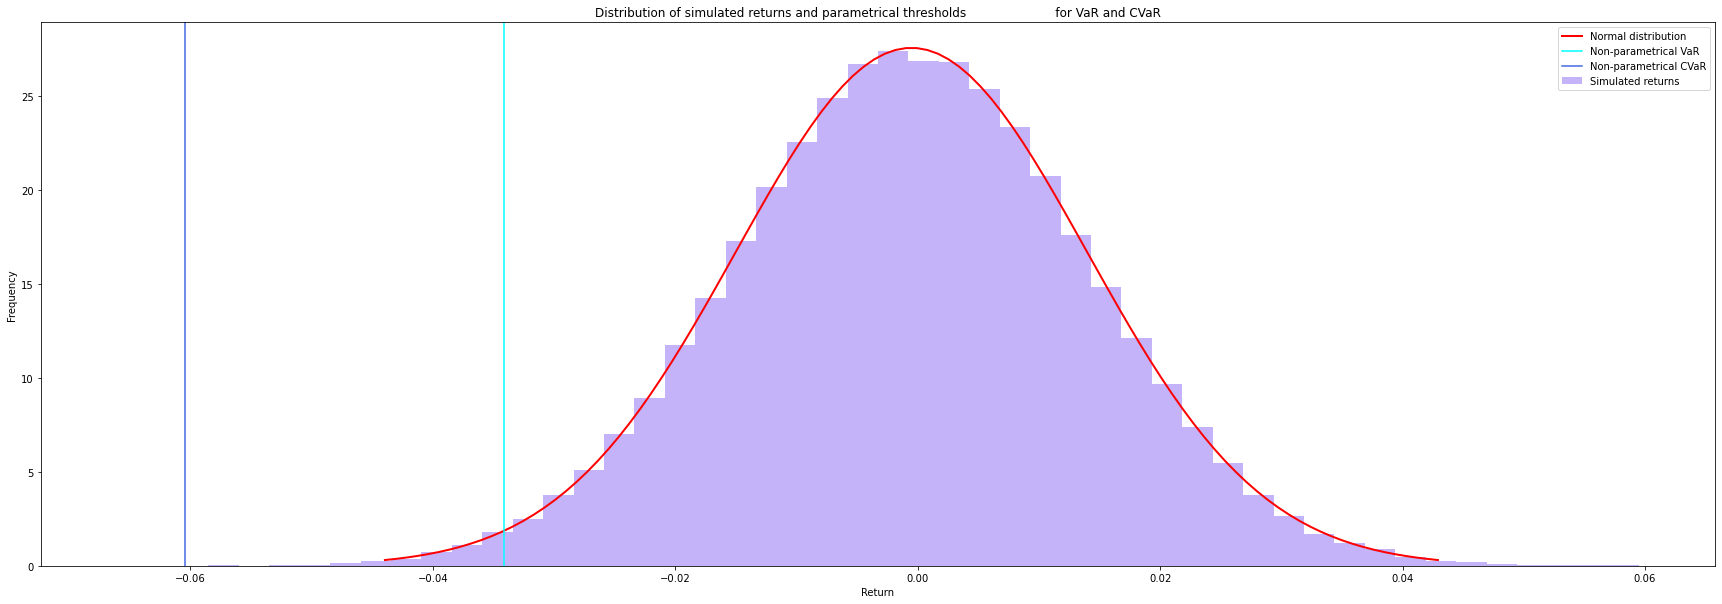

In [22]:
non_parametrical_es = pyRisk.ExpectedShortfall(
    array=data["Return"],
    alpha=0.01,
    axis=0
).non_parametrical_cvar(
    random_state=42,
    n_iter=100000,
    plot=True,
    bins=50
)

df = df.append(dict(zip(df.columns, ["Non-parametrical CVaR", non_parametrical_es])), ignore_index=True)

<div style="margin: 10px;">
    <h3 style="font-family: Arial">
        <font color="#0E1117">
            EVT CVaR
        </font>
    </h3>
</div>

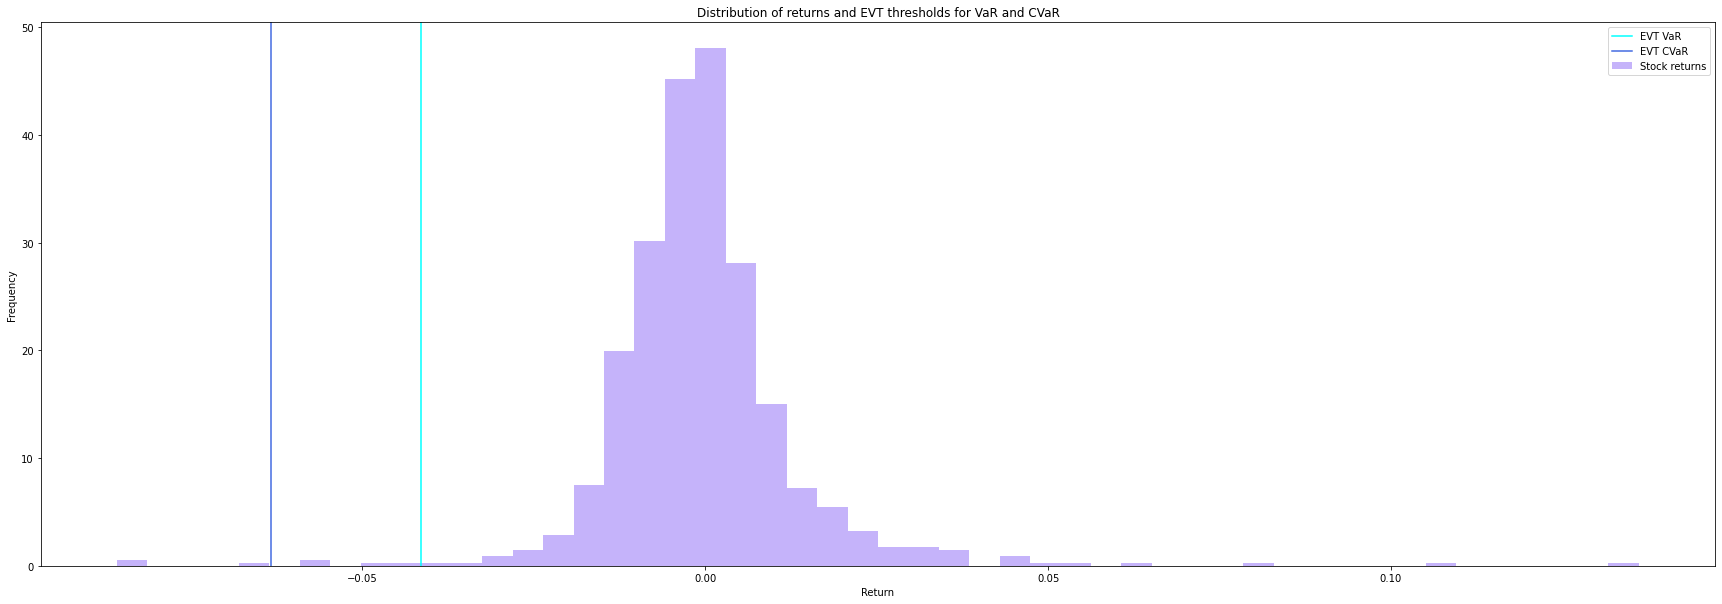

In [23]:
extreme_es = pyRisk.ExpectedShortfall(
    array=data["Return"],
    alpha=0.01,
    axis=0
).extreme_cvar(
    k=8,
    plot=True,
    bins=50
)

df = df.append(dict(zip(df.columns, ["EVT CVaR", extreme_es])), ignore_index=True)

In [24]:
df.head(5)

,Method,CVaR
0,Empirical CVaR,-0.060420
1,Parametrical CVaR,-0.060420
2,Non-parametrical CVaR,-0.060420
3,EVT CVaR,-0.063266


<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            3. Parameter of the GEV function with estimator of Pickands
        </font>
    </h2>
</div>

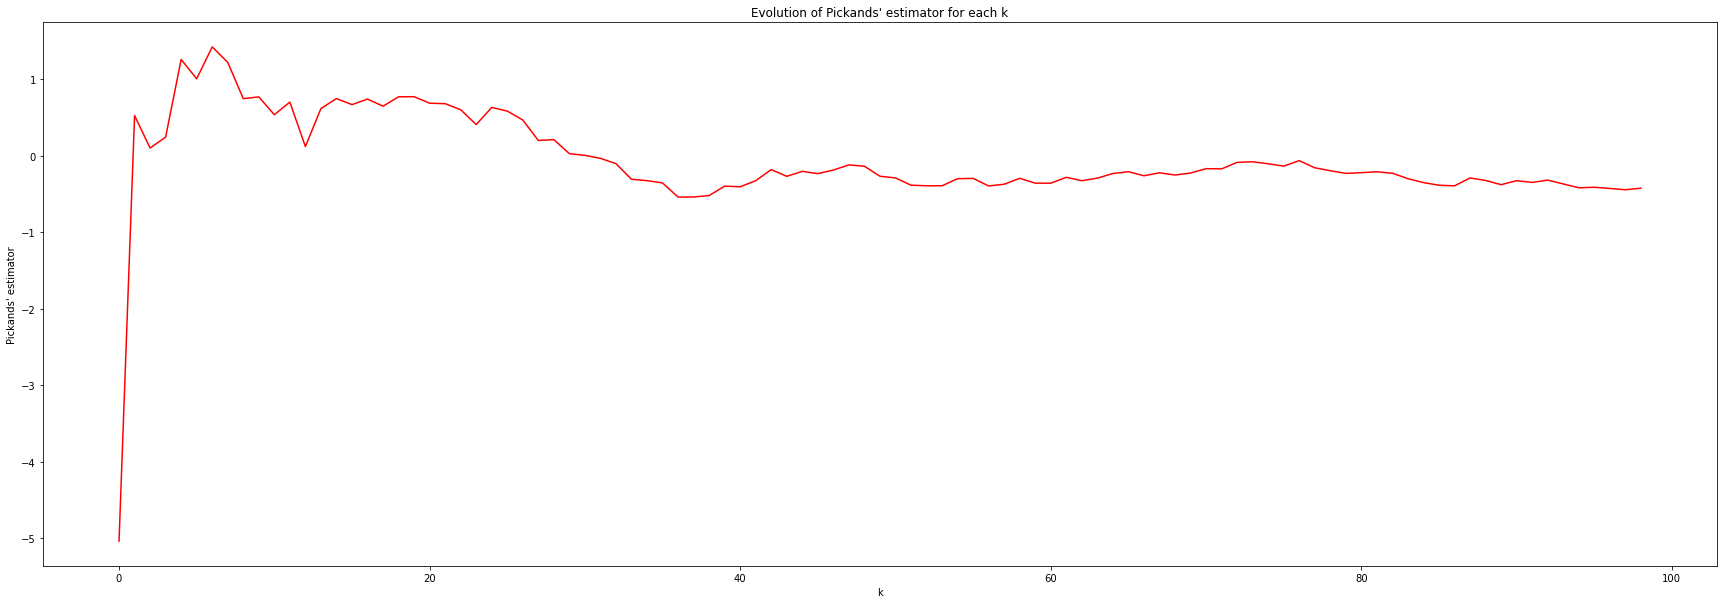

-0.42628832112361764


In [25]:
# estimator of Pickands with the GEV function
print(
    pyRisk.PickandsEstimator(
        array=data["Return"],
        k=8,
        alpha=0.01,
        axis=0
    ).gev_parameter(
        plot=True,
        n_iter=100
    )
)

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            4. Leadbetter’s extremal index
        </font>
    </h2>
</div>

In [26]:
print(
    pyRisk.Leadbetter(
        array=data["Return"],
        threshold=pyRisk.ValueAtRisk(
            array=data["Return"],
            alpha=0.01,
            axis=0
        ).empirical_var(plot=False),
        axis=0
    ).extremal_index()
)

0.5


<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            5. Statistical tests
        </font>
    </h2>
</div>

In [27]:
# train test split
train = data.iloc[:round(data.shape[0]*0.5)]
test = data.iloc[round(data.shape[0]*0.5):]

In [28]:
empirical_var = pyRisk.ValueAtRisk(
    array=train["Return"],
    alpha=0.01,
    axis=0
).empirical_var(
    plot=False
)

parametrical_var = pyRisk.ValueAtRisk(
    array=train["Return"],
    alpha=0.01,
    axis=0
).parametrical_var(
    plot=False
)

non_parametrical_var = pyRisk.ValueAtRisk(
    array=train["Return"],
    alpha=0.01,
    axis=0
).non_parametrical_var(
    random_state=42,
    n_iter=100000,
    plot=False
)[0]

extreme_var = pyRisk.ValueAtRisk(
    array=train["Return"],
    alpha=0.01,
    axis=0
).extreme_var(
    k=8,
    plot=False
)

In [29]:
student = pyRisk.BackTesting(
    array=test["Return"],
    axis=0
).student_test(
    threshold=empirical_var,
    alpha=0.05
)
print("Student test", student)

normal = pyRisk.BackTesting(
    array=test["Return"],
    axis=0
).normal_test(
    threshold=empirical_var,
    alpha=0.05
)
print("Normal test", normal)

kupiec = pyRisk.BackTesting(
    array=test["Return"],
    axis=0
).kupiec_test(
    threshold=empirical_var,
    alpha=0.01
)
print("kupiec test", kupiec)

christoffersen = pyRisk.BackTesting(
    array=test["Return"],
    axis=0
).christoffersen_test(
    threshold=empirical_var,
    alpha=0.01
)
print("Christoffersen test", christoffersen)

kupiec_christoffersen = pyRisk.BackTesting(
    array=test["Return"],
    axis=0
).kupiec_christoffersen_test(
    threshold=empirical_var,
    alpha=0.01
)
print("Kupiec & Christoffersen test", kupiec_christoffersen)

Student test {'Statistic': 47.86275668557689, 'P-value': 7.122016005063286e-165, 'Decision': 'H0 rejected'}
Normal test {'Statistic': -4.514618896743335, 'Quantile': 1.6448536269514722, 'Decision': 'H0 rejected'}
kupiec test {'Statistic': 24.374788140581362, 'Chi-square': 0.6802576255077268, 'Decision': 'H0 rejected'}
Christoffersen test {'Statistic': 1.558497136938707, 'Chi-square': 0.6802576255077268, 'Decision': 'H0 rejected'}
Kupiec & Christoffersen test {'Statistic': 25.93328527752007, 'Chi-square': 0.39042909270369086, 'Decision': 'H0 rejected'}


<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            6. Diameter for VaRs or ES
        </font>
    </h2>
</div>

In [30]:
print(
    pyRisk.BackTesting(
        array=data["Return"],
        axis=0
    ).var_diameter(
        var= [
            pyRisk.ValueAtRisk(
                array=data["Return"],
                alpha=0.01,
                axis=0
            ).empirical_var(
                plot=False
            ),
            pyRisk.ValueAtRisk(
                array=data["Return"],
                alpha=0.01,
                axis=0
            ).parametrical_var(
                plot=False
            ),
            pyRisk.ValueAtRisk(
                array=data["Return"],
                alpha=0.01,
                axis=0
            ).non_parametrical_var(
            random_state=42,
            n_iter=100000,
            plot=False
            )[0],
            pyRisk.ValueAtRisk(
                array=data["Return"],
                alpha=0.01,
                axis=0
            ).extreme_var(
                k=8,
                plot=False
            )
        ],
        alpha=0.01
    )
)

{'Confidence level': 0.99, 'Diameter for VaR models': 0.007227650079299687}


<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            7. Add a noise process to the price return process
        </font>
    </h2>
</div>

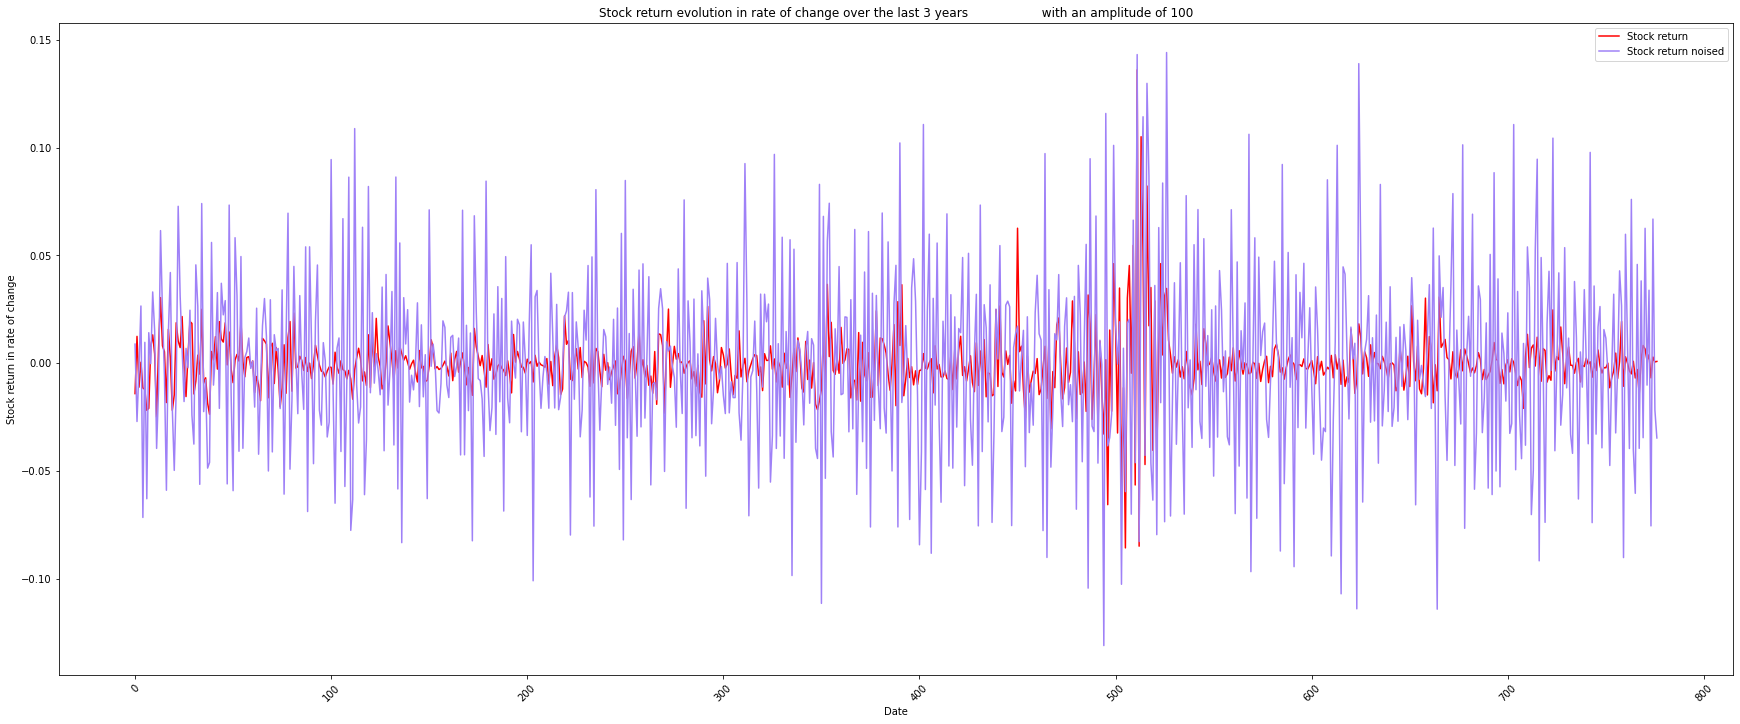

,Noise,Price,Return,Noised price,Noised return
0,199.360363,4456.24,-0.014141,4655.600363,0.008829
1,17.860829,4511.61,0.012425,4529.470829,-0.027092
2,57.737645,4461.18,-0.011178,4518.917645,-0.002330
3,175.663918,4463.12,0.000435,4638.783918,0.026525
4,-105.163832,4411.67,-0.011528,4306.506168,-0.071630


In [31]:
df_noised = pyRisk.add_noise(
    array=data["Price"],
    variance=100,
    plot=True
)

df_noised.head(5)

<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            8. Difference of VaRs
        </font>
    </h2>
</div>

In [32]:
# which VaR method is the most robust to noise?
pyRisk.var_difference(
    array1=data["Return"],
    array2=df_noised["Noised return"],
    alpha=0.01,
    axis=0,
    random_state=42,
    n_iter=100000,
    k=8,
    plot=False
)

,Method,VaR1,VaR2,Difference
0,VaR empirical,-0.034673,-0.099182,0.064509
1,VaR parametrical,-0.034202,-0.102258,0.068056
2,VaR non-parametrical,-0.034048,-0.101795,0.067748
3,VaR EVT,-0.041429,-0.101575,0.060145


<div style="margin: 10px;">
    <h2 style="font-family: Arial">
        <font color="#0E1117">
            9. Remove the noise of the price return process using the projection of your signal at
one scale
        </font>
    </h2>
</div>

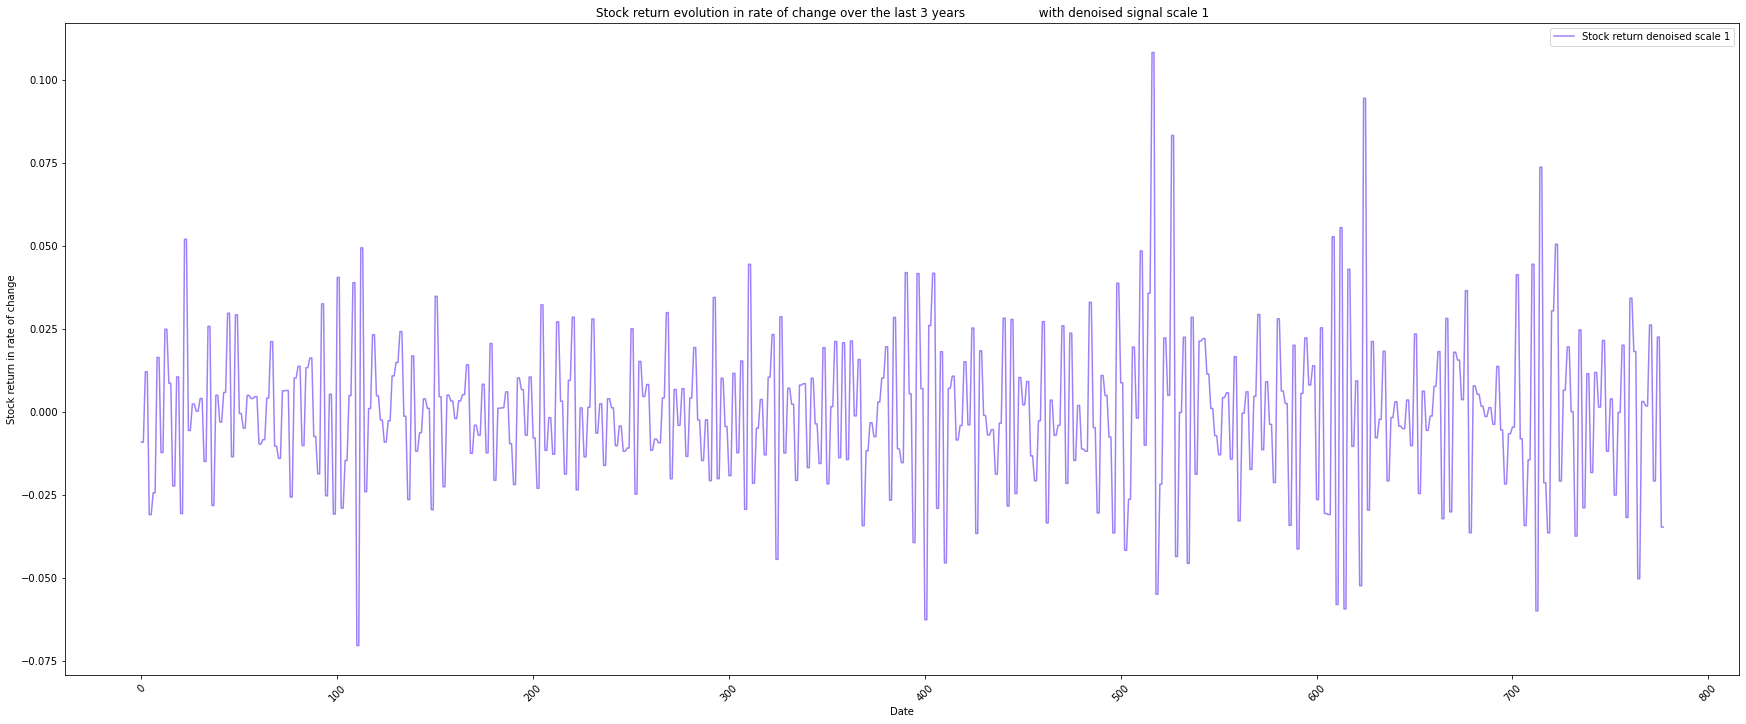

,Denoised return
0,-0.009132
1,-0.009132
2,0.012098
3,0.012098
4,-0.030989


In [33]:
df_denoised = pyRisk.remove_noise(
    array=df_noised["Noised return"],
    level=1,
    plot=True
)

df_denoised.head(5)

In [34]:
# which VaR method is the most robust to denoise?
pyRisk.var_difference(
    array1=data["Return"],
    array2=df_denoised["Denoised return"],
    alpha=0.01,
    axis=0,
    random_state=42,
    n_iter=100000,
    k=8,
    plot=False
)

,Method,VaR1,VaR2,Difference
0,VaR empirical,-0.034673,-0.058379,0.023706
1,VaR parametrical,-0.034202,-0.054374,0.020172
2,VaR non-parametrical,-0.033844,-0.054094,0.020250
3,VaR EVT,-0.041429,-0.059742,0.018313
